# IMDb "Top 250"


The IMDb "Top 250" is an online list of the top 250 highest rated films of all time, In this project I weanted to test my abililty to work with semi-structured html data and to also expand my Pandas capabilities. 

I this excercise I set out to find cinema's "golden decade", i.e. the decade with the highest average rating. A consideration that I had to make was that over time studions produced more films and that is why you'll find more films from the 2010s on this list that say the 1920s. On the surface this makes it look like the 2010s had better films than the 1920s when this might not necesarily be true. I also removed outliers with the help of some box and whisker plots. 

Importing the necesary libraries

In [1]:
import pandas as pd
import numpy as np

Reading the data

In [2]:
url = 'https://www.imdb.com/chart/top/'

In [3]:
top250 = pd.read_html(url)

In [4]:
top250

[     Unnamed: 0                                       Rank & Title  \
 0           NaN               1.  The Shawshank Redemption  (1994)   
 1           NaN                          2.  The Godfather  (1972)   
 2           NaN                 3.  The Godfather: Part II  (1974)   
 3           NaN                        4.  The Dark Knight  (2008)   
 4           NaN                           5.  12 Angry Men  (1957)   
 5           NaN                       6.  Schindler's List  (1993)   
 6           NaN  7.  The Lord of the Rings: The Return of the K...   
 7           NaN                           8.  Pulp Fiction  (1994)   
 8           NaN        9.  Il buono, il brutto, il cattivo  (1966)   
 9           NaN  10.  The Lord of the Rings: The Fellowship of ...   
 10          NaN                            11.  Fight Club  (1999)   
 11          NaN                          12.  Forrest Gump  (1994)   
 12          NaN                             13.  Inception  (2010)   
 13   

In [5]:
df = top250[0]

In [6]:
df.head()

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen,NaN
1,NaN,2. The Godfather (1972),9.1,12345678910 NOT YET RELEASED Seen,NaN
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910 NOT YET RELEASED Seen,NaN
3,NaN,4. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen,NaN
4,NaN,5. 12 Angry Men (1957),8.9,12345678910 NOT YET RELEASED Seen,NaN


In [7]:
df.describe(include = 'all')

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
count,0.0,250,250.000000,250,0.0
unique,NaN,250,NaN,1,NaN
top,NaN,189. Before Sunrise (1995),NaN,12345678910 NOT YET RELEASED Seen,NaN
freq,NaN,1,NaN,250,NaN
mean,NaN,NaN,8.254000,NaN,NaN
std,NaN,NaN,0.230252,NaN,NaN
min,NaN,NaN,8.000000,NaN,NaN
25%,NaN,NaN,8.100000,NaN,NaN
50%,NaN,NaN,8.200000,NaN,NaN
75%,NaN,NaN,8.400000,NaN,NaN


Cleaning the data

In [8]:
df = df.drop(columns = ['Unnamed: 0', 'Your Rating', 'Unnamed: 4'])

df.head()

,Rank & Title,IMDb Rating
0,1. The Shawshank Redemption (1994),9.2
1,2. The Godfather (1972),9.1
2,3. The Godfather: Part II (1974),9.0
3,4. The Dark Knight (2008),9.0
4,5. 12 Angry Men (1957),8.9


In [9]:
s1 = df['Rank & Title'].str.split(pat = '.', n = 1, expand = True)

In [10]:
s1.head()

,0,1
0,1,The Shawshank Redemption (1994)
1,2,The Godfather (1972)
2,3,The Godfather: Part II (1974)
3,4,The Dark Knight (2008)
4,5,12 Angry Men (1957)


In [11]:
df['Rank'] = s1[0]

df.head()

,Rank & Title,IMDb Rating,Rank
0,1. The Shawshank Redemption (1994),9.2,1
1,2. The Godfather (1972),9.1,2
2,3. The Godfather: Part II (1974),9.0,3
3,4. The Dark Knight (2008),9.0,4
4,5. 12 Angry Men (1957),8.9,5


In [12]:
df['Title'] =s1[1]

df.head()

,Rank & Title,IMDb Rating,Rank,Title
0,1. The Shawshank Redemption (1994),9.2,1,The Shawshank Redemption (1994)
1,2. The Godfather (1972),9.1,2,The Godfather (1972)
2,3. The Godfather: Part II (1974),9.0,3,The Godfather: Part II (1974)
3,4. The Dark Knight (2008),9.0,4,The Dark Knight (2008)
4,5. 12 Angry Men (1957),8.9,5,12 Angry Men (1957)


In [13]:
df = df.drop(columns = ['Rank & Title'])

df.head()

,IMDb Rating,Rank,Title
0,9.2,1,The Shawshank Redemption (1994)
1,9.1,2,The Godfather (1972)
2,9.0,3,The Godfather: Part II (1974)
3,9.0,4,The Dark Knight (2008)
4,8.9,5,12 Angry Men (1957)


In [14]:
s2 = df['Title'].str.split(pat = '(', n = 1, expand = True)

s2.head()

,0,1
0,The Shawshank Redemption,1994)
1,The Godfather,1972)
2,The Godfather: Part II,1974)
3,The Dark Knight,2008)
4,12 Angry Men,1957)


In [15]:
df['Title'] = s2[0]

df['Year'] = s2[1]

df.head()

,IMDb Rating,Rank,Title,Year
0,9.2,1,The Shawshank Redemption,1994)
1,9.1,2,The Godfather,1972)
2,9.0,3,The Godfather: Part II,1974)
3,9.0,4,The Dark Knight,2008)
4,8.9,5,12 Angry Men,1957)


In [16]:
s3 = df['Year'].str.split(pat = ')', n = 1, expand = True)

s3.head()

,0,1
0,1994,
1,1972,
2,1974,
3,2008,
4,1957,


In [17]:
df['Year'] = s3[0]

df.head()

,IMDb Rating,Rank,Title,Year
0,9.2,1,The Shawshank Redemption,1994
1,9.1,2,The Godfather,1972
2,9.0,3,The Godfather: Part II,1974
3,9.0,4,The Dark Knight,2008
4,8.9,5,12 Angry Men,1957


Video 4

In [18]:
df['Decade'] = df['Year']

df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,1994
1,9.1,2,The Godfather,1972,1972
2,9.0,3,The Godfather: Part II,1974,1974
3,9.0,4,The Dark Knight,2008,2008
4,8.9,5,12 Angry Men,1957,1957


In [19]:
df['Decade'] = df['Decade'].map(lambda x: x[0:3])

df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,199
1,9.1,2,The Godfather,1972,197
2,9.0,3,The Godfather: Part II,1974,197
3,9.0,4,The Dark Knight,2008,200
4,8.9,5,12 Angry Men,1957,195


In [20]:
df['Decade'] = df['Decade'] + '0s'

In [21]:
df['Decade'].describe()

count       250
unique       11
top       2010s
freq         50
Name: Decade, dtype: object

In [22]:
df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,1990s
1,9.1,2,The Godfather,1972,1970s
2,9.0,3,The Godfather: Part II,1974,1970s
3,9.0,4,The Dark Knight,2008,2000s
4,8.9,5,12 Angry Men,1957,1950s


Analysing the data

In [23]:
df['Rank'].groupby(df['Decade']).count().plot.bar(figsize = (12, 8), grid = True)

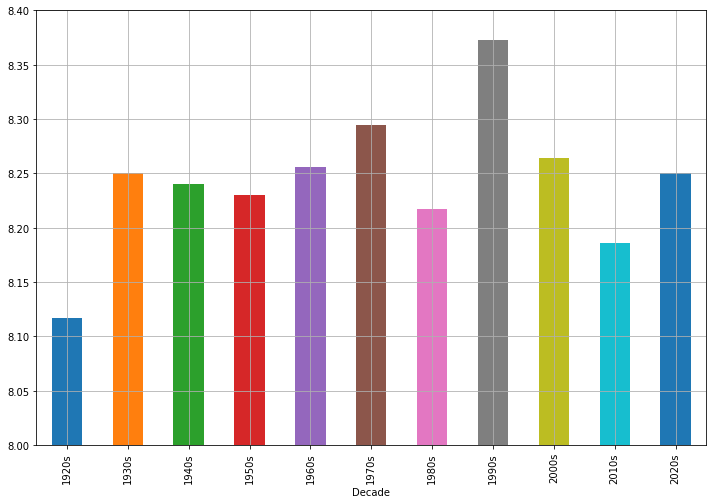

In [24]:
df['IMDb Rating'].groupby(df['Decade']).mean().plot.bar(figsize = (12, 8), grid = True, ylim = (8, 8.4))

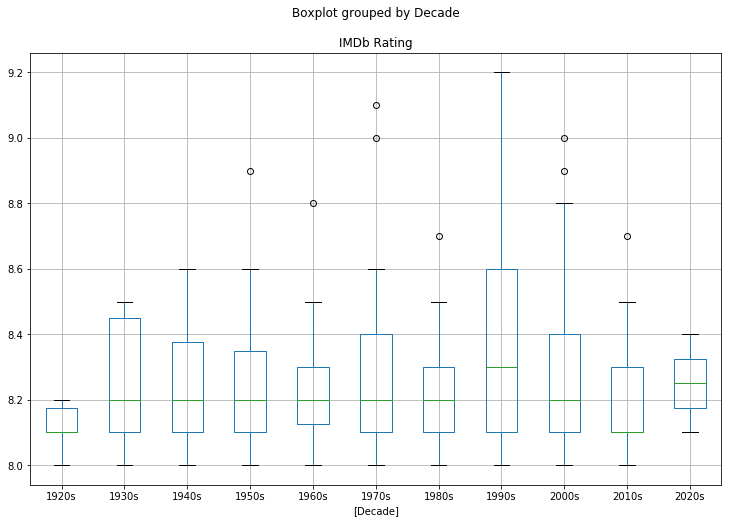

In [25]:
df.boxplot(column = ['IMDb Rating'], 
           by = ['Decade'], figsize = (12, 8), grid = True)

Removing outliers

In [26]:
df.iat[4, 0] = np.nan

In [27]:
df.iat[8, 0] = np.nan

In [28]:
df.iat[1, 0] = np.nan
df.iat[2, 0] = np.nan

In [29]:
df.iat[13, 0] = np.nan

In [30]:
df.iat[0, 0] = np.nan
df.iat[3, 0] = np.nan
df.iat[6, 0] = np.nan
df.iat[12, 0] = np.nan

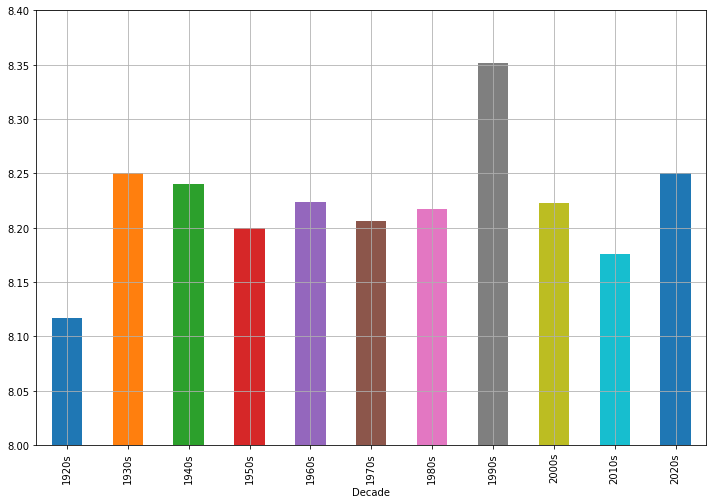

In [31]:
df['IMDb Rating'].groupby(df['Decade']).mean().plot.bar(figsize = (12, 8), grid = True, ylim = (8, 8.4))

The 1990s were the best decade for cinema!